Internet Resources:

[Python Programming.net - machine learning episodes 1-11](https://pythonprogramming.net/machine-learning-tutorial-python-introduction/)

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import quandl, math
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
# getting data

# data from Quandl: df = quandl.get("WIKI/GOOGL")
df = pd.read_csv("data/wiki_googl.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_lenght = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_lenght)
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.964351,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.254997,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.082607,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.619150,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.645878,-5.353887,2940957.0,NaN


In [3]:
# split data and prepare data
# x = features
# y = labels

x = np.array(df.drop(['label'], 1)) # 1 = axis
# mean value along the axis is subtracted from x and the resulting value is divided by standard deviation along the axis.
x = preprocessing.scale(x) 

x_lately=x[-forecast_lenght:]
forecast_df = df.iloc[-forecast_lenght:]
forecast_df = forecast_df.rename(columns={"label":"Forecast"})

x = x[:-forecast_lenght]

df.dropna(inplace=True)
y = np.array(df["label"])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
forecast_df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,Forecast
Date,,,,,
2016-11-11,771.75,1.522514,-0.651382,3592641.0,NaN
2016-11-14,753.22,3.742598,-2.402301,3688274.0,NaN
2016-11-15,775.16,1.937355,1.265889,2943889.0,NaN
2016-11-16,779.98,2.201338,-0.237900,1798360.0,NaN
2016-11-17,786.16,1.151165,0.467732,1533679.0,NaN


In [4]:
# linear regression
if os.path.exists('linearregression.pickle'):
    clf = pickle.load(open('linearregression.pickle','rb'))
else:
    clf = LinearRegression(n_jobs=-1) # do as many jobs as possible
    clf.fit(x_train, y_train)
    with open('linearregression.pickle','wb') as f: # save classifier
        pickle.dump(clf, f)
    
accuracy = clf.score(x_test, y_test)
forecast = clf.predict(x_lately)

print(forecast,accuracy, forecast_lenght)

[ 788.74732007  766.81489425  792.7692893   797.06570994  804.83880112
  792.65661969  803.43407189  803.15320383  795.79144182  799.3803876
  802.62180273  807.73048531  791.97457014  779.0310498   782.38555746
  796.44812117  793.83626711  809.21421077  813.58727195  828.29161943
  827.1042843   833.74499918  836.49493938  834.10365875  827.59617587
  831.22947439  834.71690246  830.65633088  829.16330329  827.21958548
  828.81041899  822.68372812  821.95239034  809.74664609  826.31210489
  826.3957881   832.3746803   843.49936056  846.31946507  845.43414095
  849.23615882  848.66303748  850.59965773  846.65943431  848.61985697
  843.26367666  847.80910805  863.06815728  868.91270102  878.09961949
  875.52176193  860.86583566  840.59125311  838.93057716  833.07542547
  836.83568573  839.20877688  840.79126298  848.49362767  848.96927563
  849.60913     854.42640672  858.74107172  859.66512591  856.91252504
  862.21142865  866.3662517   869.17260917  871.22375908  870.24926894
  867.6

d:\dev\tutorials\env\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


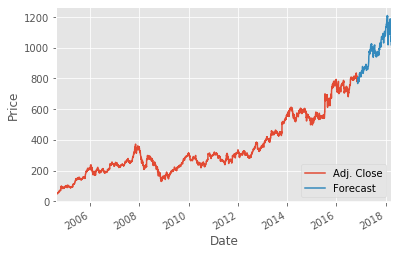

In [5]:
#plotting
style.use('ggplot')

forecast_df["Forecast"] = forecast

df['Adj. Close'].plot()
forecast_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()